In [3]:
import os
import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
import seaborn as sns
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rcParams['figure.figsize'] = (5, 5)
os.chdir("/home/octopus/Documents/2scripts/ScientificPython/3_ML/Lecture9_LinR_LogR_BC/")

In [4]:
df = pd.read_csv('data/diabetes.csv')
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# df.describe()
# sns.pairplot(df)
# sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=5)

In [6]:
X_var = np.asarray(df.iloc[:,:-1])
y_var = np.asarray(df['Outcome'])

print(cl('X_var samples : ', attrs = ['bold']), X_var[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_var[:5])

X_var samples :  [[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
y_var samples :  [1 0 1 0 1]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_var, 
                                                    y_var, 
                                                    test_size = 0.3)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[:10])

X_train samples :  [[  1.     97.     66.     15.    140.     23.2     0.487  22.   ]
 [  2.     75.     64.     24.     55.     29.7     0.37   33.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [  6.    104.     74.     18.    156.     29.9     0.722  41.   ]
 [  1.    126.     56.     29.    152.     28.7     0.801  21.   ]]
X_test samples :  [[0.00e+00 1.65e+02 9.00e+01 3.30e+01 6.80e+02 5.23e+01 4.27e-01 2.30e+01]
 [0.00e+00 1.46e+02 7.00e+01 0.00e+00 0.00e+00 3.79e+01 3.34e-01 2.80e+01]
 [4.00e+00 1.14e+02 6.50e+01 0.00e+00 0.00e+00 2.19e+01 4.32e-01 3.70e+01]
 [1.10e+01 1.27e+02 1.06e+02 0.00e+00 0.00e+00 3.90e+01 1.90e-01 5.10e+01]
 [2.00e+00 8.30e+01 6.60e+01 2.30e+01 5.00e+01 3.22e+01 4.97e-01 2.20e+01]]
y_train samples :  [0 0 0 1 0 0 1 0 0 1]
y_test samples :  [0 1 0 0 0 1 1 0 0 1]


In [10]:
# Modelling

# lr = LogisticRegression()
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train,y_train)

print(cl(lr, attrs = ['bold']))

LogisticRegression(solver='liblinear')


The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. ‘C’ parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now, let's fit our model with the train set in python.

In [8]:
print(lr.classes_)
print(lr.intercept_)
print(lr.coef_)

[0 1]
[-5.09340864]
[[ 0.10152804  0.02875716 -0.01596423  0.00148488 -0.00101315  0.04502143
   0.20678836  0.00394436]]


In [11]:
# Predictions

yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

# prob to be 0 | prob to be 1

yhat samples :  [1 0 0 0 0 1 1 0 0 0]
yhat_prob samples :  [[0.47996921 0.52003079]
 [0.60405408 0.39594592]
 [0.78442059 0.21557941]
 [0.51855757 0.48144243]
 [0.8832369  0.1167631 ]
 [0.28519933 0.71480067]
 [0.29049948 0.70950052]
 [0.87721032 0.12278968]
 [0.8110618  0.1889382 ]
 [0.98172616 0.01827384]]


#### Model evaluation:

In [10]:
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       151
           1       0.78      0.53      0.63        80

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



In [12]:
confusion_matrix(y_test, yhat, labels = [1,0])

array([[ 46,  40],
       [ 19, 126]])

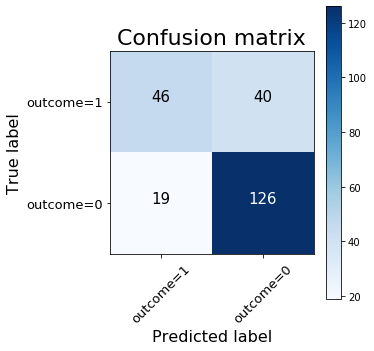

In [13]:
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes = ['outcome=1','outcome=0'], 
                      normalize = False,  
                      title = 'Confusion matrix')

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

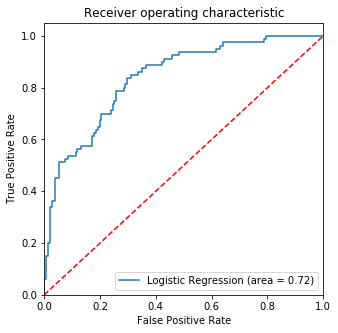

In [13]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


## 'digits' dataset

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

In [15]:
digits = load_digits()
print(digits.data.shape)
# Each image has 64 px, with a width of 8 px and a height of 8 px.

(1797, 64)


The inputs (𝐱) are vectors with 64 dimensions or values. Each input vector describes one image. Each of the 64 values represents one pixel of the image. The input values are the integers between 0 and 16, depending on the shade of gray for the corresponding pixel. The output (𝑦) for each observation is an integer between 0 and 9, consistent with the digit on the image. There are ten classes in total, each corresponding to one image.

<Figure size 360x360 with 0 Axes>

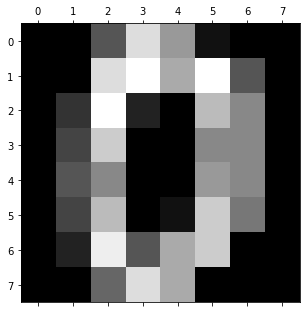

In [16]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [18]:
x, y = load_digits(return_X_y=True)

In [19]:
print(len(x))
print(len(y))

1797
1797


In [20]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [21]:
print(y[0])
print(y)

0
[0 1 2 ... 8 9 8]


<Figure size 360x360 with 0 Axes>

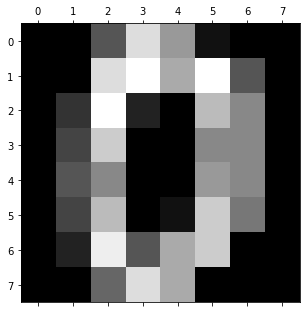

In [22]:
plt.gray() 
plt.matshow(x[0].reshape(8,8)) 
plt.show() 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2)
# x_train: the part of x used to fit the model
# x_test: the part of x used to evaluate the model
# y_train: the part of y that corresponds to x_train
# y_test: the part of y that corresponds to x_test

In [24]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:
1. Calculate the mean and standard deviation for each column.
2. Subtract the corresponding mean from each element.
3. Divide the obtained difference by the corresponding standard deviation.

It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

In [25]:
x_train_sc[0].reshape(8,8)

array([[ 0.  , -0.33, -0.03,  0.26,  0.27,  0.38, -0.41, -0.13],
       [-0.07, -0.62,  1.05, -0.23,  0.59,  1.28,  1.16, -0.13],
       [-0.05, -0.45,  1.07, -0.34, -0.81,  0.99,  2.27, -0.12],
       [-0.04, -0.79, -0.01,  1.22,  0.98,  1.27, -0.63, -0.05],
       [ 0.  , -0.68,  0.37,  1.11,  0.62,  0.92, -0.81,  0.  ],
       [-0.06,  1.15,  1.23, -0.48, -1.21,  1.37,  0.58, -0.09],
       [-0.04,  3.  ,  1.15, -0.47, -0.61,  1.2 ,  0.06, -0.21],
       [-0.03, -0.3 ,  0.3 ,  0.67,  0.85,  0.54, -0.5 , -0.19]])

<Figure size 360x360 with 0 Axes>

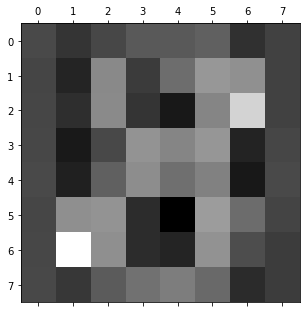

In [26]:
plt.gray() 
plt.matshow(x_train_sc[0].reshape(8,8)) 
plt.show() 

In [27]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x_train_sc, y_train)

# Multinomial logistic regression is a classification method that generalizes logistic regression 
# to multiclass problems, i.e. with more than two possible discrete outcomes.

LogisticRegression(multi_class='multinomial')

In [28]:
x_test = scaler.transform(x_test_sc)
y_pred = model.predict(x_test_sc)
print(model.score(x_train_sc, y_train))
print(model.score(x_test_sc, y_test))

0.9979123173277662
0.9777777777777777


In [29]:
confusion_matrix(y_test, y_pred)

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 32,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 34]])

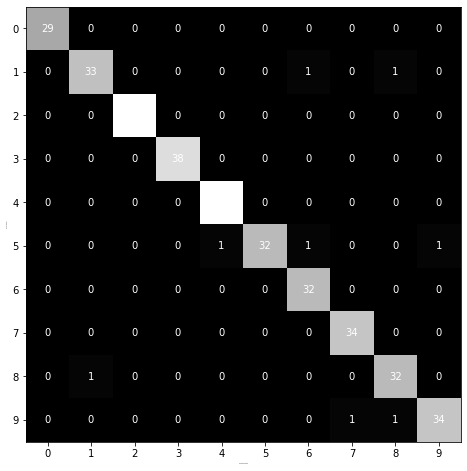

In [30]:
font_size = 1

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      0.94      0.96        35
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        38
           4       0.98      1.00      0.99        44
           5       1.00      0.91      0.96        35
           6       0.94      1.00      0.97        32
           7       0.97      1.00      0.99        34
           8       0.94      0.97      0.96        33
           9       0.97      0.94      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
########################################################
# Step: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)



import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
########################################################